<a href="https://colab.research.google.com/github/rafaelmt35/machinelearning2023/blob/main/classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.features

# variable information
print(covertype.variables)

                                  name     role     type demographic  \
0                            Elevation  Feature  Integer        None   
1                               Aspect  Feature  Integer        None   
2                                Slope  Feature  Integer        None   
3     Horizontal_Distance_To_Hydrology  Feature  Integer        None   
4       Vertical_Distance_To_Hydrology  Feature  Integer        None   
5      Horizontal_Distance_To_Roadways  Feature  Integer        None   
6                        Hillshade_9am  Feature  Integer        None   
7                       Hillshade_Noon  Feature  Integer        None   
8                        Hillshade_3pm  Feature  Integer        None   
9   Horizontal_Distance_To_Fire_Points  Feature  Integer        None   
10                     Wilderness_Area  Feature  Integer        None   
11                          Soil_Type1  Feature  Integer        None   
12                          Soil_Type2  Feature  Integer        

<H1> Data Preprocessing </H1>

In [5]:
selected_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am']

X = covertype.data.features[selected_columns]

In [6]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am'],
      dtype='object')

In [7]:
X.head(5)

,,,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am
2596,51,3,258,0,510,221,232,148,6279
2590,56,2,212,-6,390,220,235,151,6225
2804,139,9,268,65,3180,234,238,135,6121
2785,155,18,242,118,3090,238,238,122,6211
2595,45,2,153,-1,391,220,234,150,6172


In [8]:
y.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
      dtype='object')

In [9]:
class_names_dict = {2:'positive', 0:'negative', 1:'negative', 3:'negative', 4:'negative', 5:'negative', 6:'negative', 7:'negative'}
y['Target'] = y['Cover_Type'].map(class_names_dict)

In [10]:
selected_columns = ['Target']

y = covertype.data.features[selected_columns]

In [11]:
y.columns

Index(['Target'], dtype='object')

In [12]:
y.head(5)

,,,Target
2596,51,3,negative
2590,56,2,negative
2804,139,9,positive
2785,155,18,positive
2595,45,2,negative


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
print('Initial size = ',X.shape,' Train size = ',X_train.shape, 'Test size = ', X_test.shape)

Initial size =  (581012, 7)  Train size =  (464809, 7) Test size =  (116203, 7)


<H2> Random Forest </H2>

In [14]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)

<ipython-input-14-6f5cb8fbe732>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

In [16]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

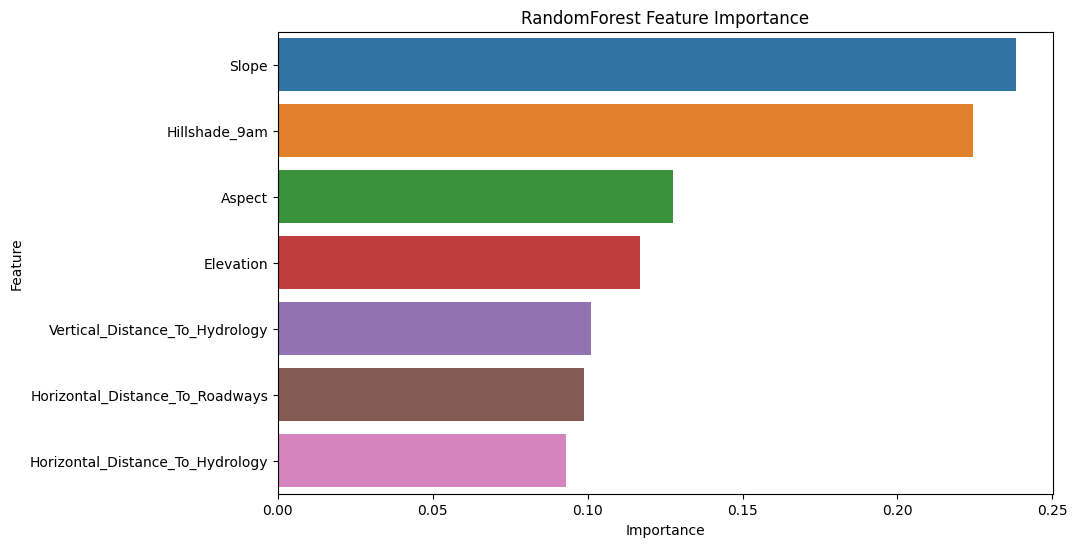

In [17]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title('RandomForest Feature Importance')
plt.show()

In [18]:
print("Random Forest Feature Importance \n")

for index, value in enumerate(feature_importance_df['Importance']):
    print(f"{feature_importance_df['Feature'].iloc[index]}: {value:.2f}")

Random Forest Feature Importance 

Slope: 0.24
Hillshade_9am: 0.22
Aspect: 0.13
Elevation: 0.12
Vertical_Distance_To_Hydrology: 0.10
Horizontal_Distance_To_Roadways: 0.10
Horizontal_Distance_To_Hydrology: 0.09


In [19]:
y_pred = rf_classifier.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.91      0.90     59601
    positive       0.90      0.88      0.89     56602

    accuracy                           0.89    116203
   macro avg       0.89      0.89      0.89    116203
weighted avg       0.89      0.89      0.89    116203



<H2> Decision Tree </H2>

In [20]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
feature_importances = dt_classifier.tree_.compute_feature_importances(normalize = False)

In [22]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

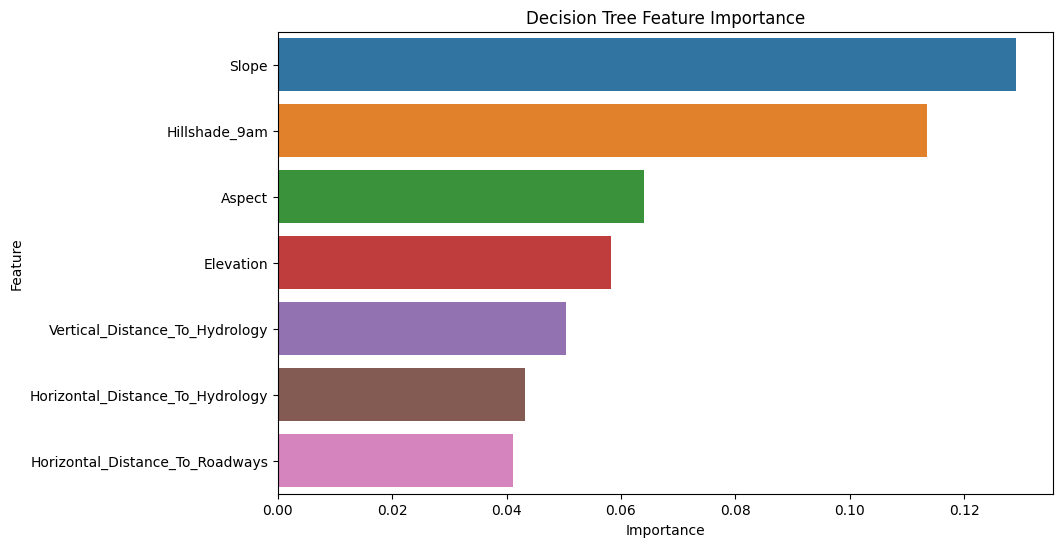

In [23]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y ='Feature', data = feature_importance_df)
plt.title('Decision Tree Feature Importance')
plt.show()

In [24]:
print("Decision Tree Feature Importance \n")

for index, value in enumerate(feature_importance_df['Importance']):
    print(f"{feature_importance_df['Feature'].iloc[index]}: {value:.2f}")

Decision Tree Feature Importance 

Slope: 0.13
Hillshade_9am: 0.11
Aspect: 0.06
Elevation: 0.06
Vertical_Distance_To_Hydrology: 0.05
Horizontal_Distance_To_Hydrology: 0.04
Horizontal_Distance_To_Roadways: 0.04


In [25]:
y_pred = dt_classifier.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85     59601
    positive       0.84      0.84      0.84     56602

    accuracy                           0.84    116203
   macro avg       0.84      0.84      0.84    116203
weighted avg       0.84      0.84      0.84    116203



<H2> Logistic Regression </H2>

In [26]:
logreg_classifier = LogisticRegression(random_state = 42, max_iter = 1000)
logreg_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [27]:
coefficients = logreg_classifier.coef_[0]

In [28]:
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients_df = feature_coefficients_df.sort_values(by = 'Coefficient', ascending = False)

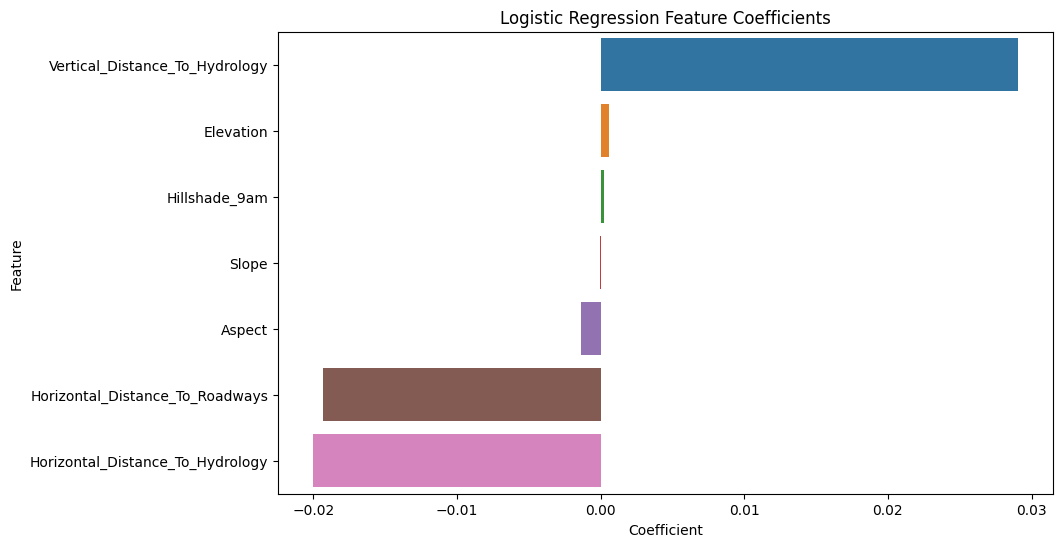

In [29]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Coefficient', y = 'Feature', data=feature_coefficients_df)
plt.title('Logistic Regression Feature Coefficients')
plt.show()

In [30]:
print("Logistic Regression Feature Coefficients \n")

for index, value in enumerate(feature_coefficients_df['Coefficient']):
    print(f"{feature_coefficients_df['Feature'].iloc[index]}: {value:.2f}")

Logistic Regression Feature Coefficients 

Vertical_Distance_To_Hydrology: 0.03
Elevation: 0.00
Hillshade_9am: 0.00
Slope: -0.00
Aspect: -0.00
Horizontal_Distance_To_Roadways: -0.02
Horizontal_Distance_To_Hydrology: -0.02


In [31]:
y_pred = logreg_classifier.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)

Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.66      0.61     59601
    positive       0.57      0.46      0.51     56602

    accuracy                           0.56    116203
   macro avg       0.56      0.56      0.56    116203
weighted avg       0.56      0.56      0.56    116203

